# Exploratory Data Analysis

This notebook performs an Exploratory Data Analysis (EDA) of a job vacancy dataset. The steps include:

1. **Item Count per Column**
2. **Average Job Description Length**
3. **Duplicate Removal**

This analysis helps to better understand the dataset's structure and prepares the data for further analysis.

First, let's import the necessary dependencies, then load and display our dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('job_bioinfo_csv/bioinf_ads.csv')

In [3]:
df.head(5)

,Unnamed: 0,diffbotUri,humanLanguage,id,lastCrawlTime,name,pageUrl,requirements,resolvedPageUrl,summary,tasks,text,title,type
0,0,http://diffbot.com/entity/JOB966384586,en,JOB966384586,1591962958,"Bioinformatics Specialist, GIS",https://www.nature.com/naturecareers/job/bioin...,NaN,NaN,The Genomics Institute of Singapore () has an ...,NaN,The Genomics Institute of Singapore () has an ...,"Bioinformatics Specialist, GIS",Job
1,1,http://diffbot.com/entity/JOB1028283361,en,JOB1028283361,1549734701,Postdoctoral Fellowship in Bioinformatics and ...,http://www.nature.com/naturejobs/science/jobs/...,NaN,https://www.nature.com/naturecareers/job?id=67...,"The laboratories of Drs. Jeffrey Pessin, Fajun...",NaN,"The laboratories of Drs. Jeffrey Pessin, Fajun...",Postdoctoral Fellowship in Bioinformatics and ...,Job
2,2,http://diffbot.com/entity/JOB1570298833,en,JOB1570298833,1486437231,"Bioinformatics Analyst : Bar Harbor, ME, Unite...",http://www.nature.com/naturejobs/science/jobs/...,NaN,NaN,\nTweet\nFacebook\nLinkedIn\nThe MDI Biologica...,NaN,\nTweet\nFacebook\nLinkedIn\nThe MDI Biologica...,"Bioinformatics Analyst : Bar Harbor, ME, Unite...",Job
3,3,http://diffbot.com/entity/JOB2313411533,en,JOB2313411533,1629620706,Postdoctoral Fellow in Bioinformatics and/or G...,https://www.nature.com/naturecareers/job/postd...,"Must hold a Ph.D. degree, with publications in...",NaN,We are looking for enthusiastic postdoctoral f...,NaN,We are looking for enthusiastic postdoctoral f...,Postdoctoral Fellow in Bioinformatics and/or G...,Job
4,4,http://diffbot.com/entity/JOB2513853425,en,JOB2513853425,1563630178,"Postdoctoral Position in Bioinformatics, Micro...",https://www.nature.com/naturecareers/job/postd...,NaN,NaN,Work group:\nInstitute of Virology\nArea of re...,NaN,Work group:\nInstitute of Virology\nArea of re...,"Postdoctoral Position in Bioinformatics, Micro...",Job


### 1. **Item Count per Column**
Analyzing the number of items in each column of the dataset to understand its distribution and identify potential missing data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2805 non-null   int64 
 1   diffbotUri       2805 non-null   object
 2   humanLanguage    2805 non-null   object
 3   id               2805 non-null   object
 4   lastCrawlTime    2805 non-null   int64 
 5   name             2805 non-null   object
 6   pageUrl          2805 non-null   object
 7   requirements     454 non-null    object
 8   resolvedPageUrl  336 non-null    object
 9   summary          2700 non-null   object
 10  tasks            578 non-null    object
 11  text             2700 non-null   object
 12  title            2805 non-null   object
 13  type             2805 non-null   object
dtypes: int64(2), object(12)
memory usage: 306.9+ KB


In [5]:
#total ads
len(df)

2805

### 2. **Average Job Description Length**: 

Calculating the average length of job descriptions to assess the level of detail provided in each listing.

Create a new **word_count** column that stores the word count for each description in the text column.

In [6]:
df['word_count'] = df['text'].str.count(' ') + 1

Calculating the average of the **word_count** column

In [7]:
mean_word_count = df['word_count'].mean()

print("Mean of column 'word_count':", mean_word_count)

Mean of column 'word_count': 314.0559259259259


In [8]:
texts = list(df.text.values)
tam = []

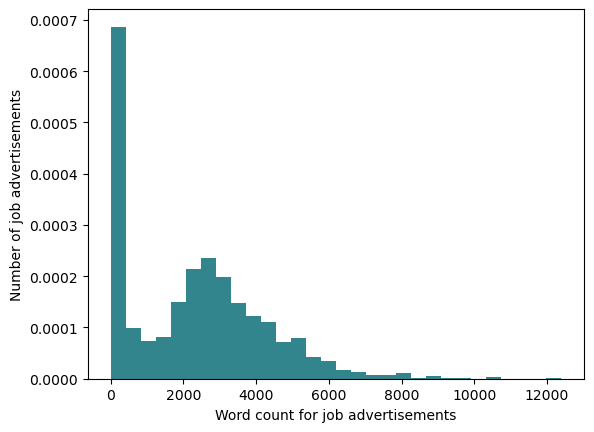

In [9]:
for i in texts:
    tam.append(len(str(i)))

#"crest" palette
crest_color = sns.color_palette("crest", n_colors=1)

plt.hist(tam, density=True, bins=30, color=crest_color)  # Set the color to the "crest" color
plt.ylabel('Number of job advertisements')
plt.xlabel('Word count for job advertisements')
plt.show()  # Display the histogramd

3. **Duplicate Removal**

Eliminating duplicate records based on the job listing **URL** and **ID** to ensure data integrity and uniqueness.

Display lines with duplicate **pageUrl**

In [10]:
df_duplicates = df[df.duplicated(subset=['pageUrl'])]

df_sorted = df_duplicates.sort_values(by='pageUrl')

print(df_sorted.loc[:, ['pageUrl']])

                                                pageUrl
2782  http://jobs.blackenterprise.com/jobs/scientifi...
1600  http://nyc.jobs/new-york-ny/bioinformatics-eng...
1815  http://webapp.science.hku.hk/sr4/servlet/enqui...
2756  http://www.biotechcrossing.com/lcjsjobdetail.p...
2780  http://www.biotechcrossing.com/lcjsjobdetail.p...
...                                                 ...
69    https://www.nature.com/naturecareers/job?id=68...
2381  https://www.training.nih.gov/jobs/view/_10/570...
2368  https://www.training.nih.gov/postdoc_jobs_nih/...
2377  https://www.training.nih.gov/postdoc_jobs_nih/...
2391  https://www.training.nih.gov/postdoc_jobs_nih/...

[110 rows x 1 columns]


In [11]:
repeated = ['pageUrl', 'id']
df2 = df.drop_duplicates(subset = repeated)
len(df2)

2717

Removing NaN lines in **text**

In [13]:
print(df.isnull().sum())

Unnamed: 0            0
diffbotUri            0
humanLanguage         0
id                    0
lastCrawlTime         0
name                  0
pageUrl               0
requirements       2351
resolvedPageUrl    2469
summary             105
tasks              2227
text                105
title                 0
type                  0
word_count          105
dtype: int64


In [14]:
df2 = df2.dropna(subset=['text'])
len(df2)

2613

In [15]:
print(df2.isnull().sum())

Unnamed: 0            0
diffbotUri            0
humanLanguage         0
id                    0
lastCrawlTime         0
name                  0
pageUrl               0
requirements       2168
resolvedPageUrl    2342
summary               0
tasks              2048
text                  0
title                 0
type                  0
word_count            0
dtype: int64


In [16]:
len(df2)/len(df)*100

93.15508021390374

In [17]:
df2['word_count'] = df2['text'].str.count(' ') + 1

mean_word_count = df['word_count'].mean()

print("Mean of column 'word_count':", mean_word_count)

Mean of column 'word_count': 314.0559259259259


In [19]:
texts = list(df2.text.values)
tam = []

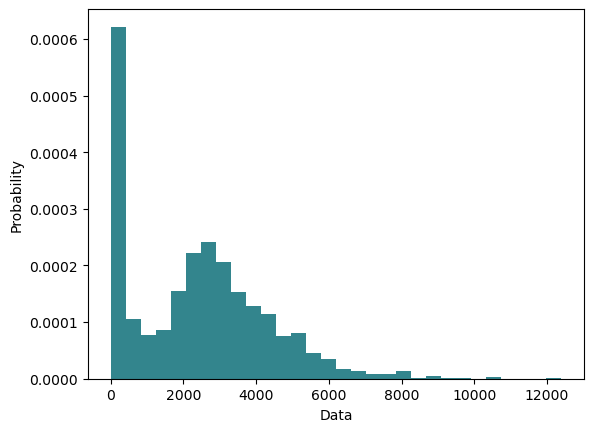

In [20]:
for i in texts:
    tam.append(len(str(i)))
    if type(i) is not str:
        print(i)
        
crest_color = sns.color_palette("crest", n_colors=1)

plt.hist(tam, density=True, bins=30, color=crest_color)
plt.ylabel('Probability')
plt.xlabel('Data');

Removing rows with short **text** based on the average length

In [21]:
for i in range(len(tam)):
    if tam[i] < 200:
        print(i)
        print(texts[i])
        print('\n'*2)

27
German Cancer Research Center in the Helmholtz Association (DKFZ)
Work group:
Bioinformatics and Omics Data Analytics
Area of research:
Scientific / postdoctoral posts
Job description:
Favorite




204

Interested candidates should send a curriculum vitae and a list of at least three references to Dr. Jaehyuk Choi (Jaehyuk.choi@northwestern.edu).




298

Postdoctoral Scientists and Staff Scientists (Bioinformatics)




349

Research Associate in Microbial genomics and Bioinformatics (fixed-term post)




351
We aren't able to find any stories for you right now. Try following some people or topics that interest you.




357

Resources for Bioinformatics Resource Center




364





366

Found 2 jobs




369

Bioinformatics Jobs
Found 3 jobs




400
© 2010 Case Western Reserve University, Cleveland, Ohio 44106, 216.368.2000 (legal notice)



411

Found 3 jobs




445
© 2010 Case Western Reserve University, Cleveland, Ohio 44106, 216.368.2000 (legal notice)



458





461

From Prote

In [22]:
for index, row in df2.iterrows():
    if len(str(row.text)) < 200:
        df2 = df2.drop(index)

In [23]:
len(df2)

2016

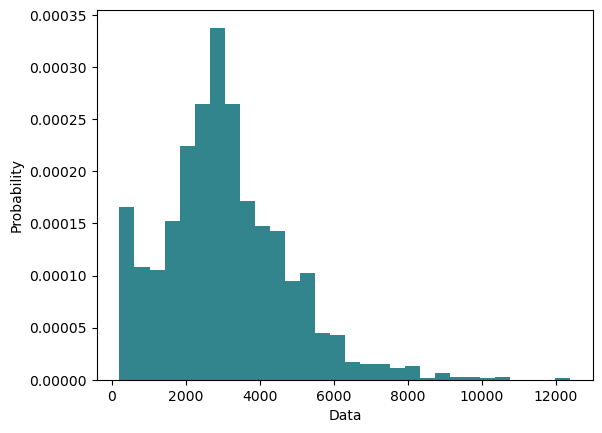

In [24]:
texts = list(df2.text.values)
tam = []

for i in texts:
    tam.append(len(str(i)))
    if type(i) is not str:
        print(i)
        
crest_color = sns.color_palette("crest", n_colors=1)

plt.hist(tam, density=True, bins=30, color=crest_color)
plt.ylabel('Probability')
plt.xlabel('Data');

In [26]:
df2.to_csv('job_bioinfo_csv/bioinf_ads_deduplicated.csv')